<a href="https://colab.research.google.com/github/Xiongfeng-Jin/GAN-In-Action/blob/master/GenerateHandWrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import  Dense, Flatten, Reshape
from keras.layers.advanced_activations import  LeakyReLU
from keras.models import  Sequential
from keras.optimizers import  Adam

Using TensorFlow backend.


In [0]:
image_rows = 28
image_cols = 28
channels = 1
image_shape = (image_rows,image_cols,channels)
z_dim = 100

In [0]:
def build_generator(image_shape,z_dim):
  model = Sequential()
  model.add(Dense(128,input_dim=z_dim))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(28*28*1,activation='tanh'))
  model.add(Reshape(image_shape))
  return model

In [0]:
def build_discriminator(image_shape):
  model = Sequential()
  model.add(Flatten(input_shape=image_shape))
  model.add(Dense(128))
  model.add(LeakyReLU(alpha=0.01))
  model.add(Dense(1,activation='sigmoid'))
  return model

In [0]:
def build_gan(generator,discriminator):
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model

In [10]:
discriminator = build_discriminator(image_shape)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])
generator = build_generator(image_shape,z_dim)
discriminator.trainable = False
gan = build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy',optimizer=Adam())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
losses = []
accuracies = []
iteration_checkpoints = []
def sample_images(generator,image_grid_rows=4,image_grid_cols=4):
  z = np.random.normal(0,1,(image_grid_rows*image_grid_cols,z_dim))
  gen_images =generator.predict(z)
  gen_images = 0.5*gen_images + 0.5
  fig,axs = plt.subplots(image_grid_rows,image_grid_cols,figsize=(4,4),sharey=True,sharex=True)
  cnt = 0
  for i in range(image_grid_rows):
    for j in range(image_grid_cols):
      axs[i,j].imshow(gen_images[cnt,:,:,0],cmap='gray')
      axs[i,j].axis('off')
      cnt += 1

In [0]:
def train(iterations,batch_size,sample_interval):
  (x_train,_),(_,_) = mnist.load_data()
  x_train = x_train / 127.5 - 1
  x_train = np.expand_dims(x_train,axis=3)
  real = np.ones((batch_size,1))
  fake = np.zeros((batch_size,1))
  for iteration in range(iterations):
    idx = np.random.randint(0,x_train.shape[0],batch_size)
    imgs = x_train[idx]
    z = np.random.normal(0,1,(batch_size,z_dim))
    gen_image = generator.predict(z)
    d_loss_real = discriminator.train_on_batch(imgs,real)
    d_loss_fake = discriminator.train_on_batch(gen_image,fake)
    d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
    z = np.random.normal(0,1,(batch_size,z_dim))
    gen_images = generator.predict(z)
    g_loss = gan.train_on_batch(z,real)
    if (iteration + 1) % sample_interval == 0:
      losses.append((d_loss,g_loss))
      accuracies.append(100.0*accuracy)
      iteration_checkpoints.append(iteration + 1)
      print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (iteration+1,d_loss,100*accuracy,g_loss))
      sample_images(generator)

In [0]:
iterations = 20000
batch_size = 128
sample_interval = 1000

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000 [D loss: 0.353080, acc.: 84.38%] [G loss: 4.681313]
2000 [D loss: 0.161911, acc.: 94.14%] [G loss: 4.581576]
3000 [D loss: 0.572886, acc.: 79.69%] [G loss: 3.216175]
4000 [D loss: 0.428471, acc.: 78.91%] [G loss: 3.799271]
5000 [D loss: 0.284019, acc.: 91.02%] [G loss: 3.737293]
6000 [D loss: 0.500486, acc.: 72.66%] [G loss: 2.771375]
7000 [D loss: 0.468592, acc.: 80.47%] [G loss: 2.971076]
8000 [D loss: 0.316073, acc.: 84.77%] [G loss: 3.468971]
9000 [D loss: 0.412275, acc.: 81.64%] [G loss: 2.833361]
10000 [D loss: 0.566085, acc.: 77.73%] [G loss: 2.768219]
11000 [D loss: 0.516220, acc.: 78.52%] [G loss: 2.156729]
12000 [D loss: 0.337044, acc.: 86.33%] [G loss: 2.630960]
13000 [D loss: 0.459265, acc.: 76.17%] [G loss: 2.451924]
14000 [D loss: 0.365463, acc.: 84.38%] [G loss: 2.425236]
15000 [D loss: 0.420192, acc.: 80.47%] [G loss: 2.397619]
16000 [D loss: 0.358648, acc.: 85.94%] [G loss: 3.012147]
17000 [D loss: 0.297751, acc.: 87.89%] [G loss: 2.829722]
18000 [D loss: 0.320183

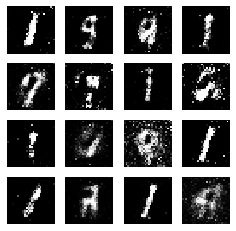

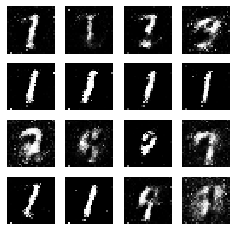

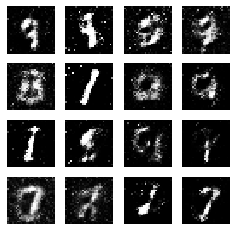

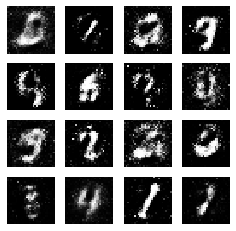

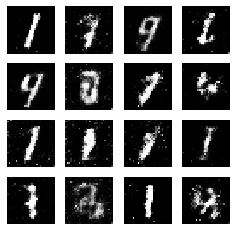

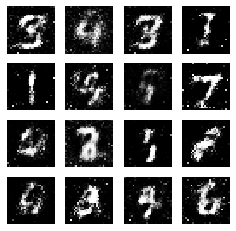

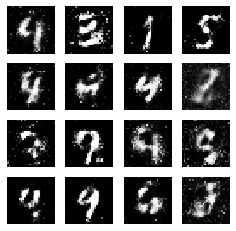

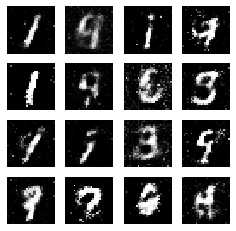

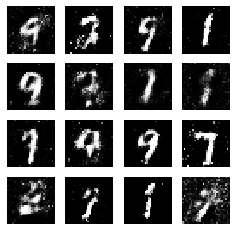

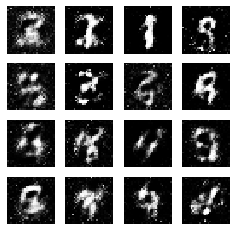

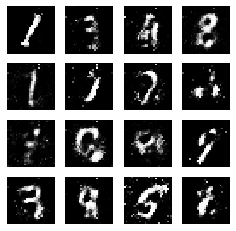

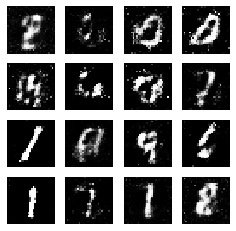

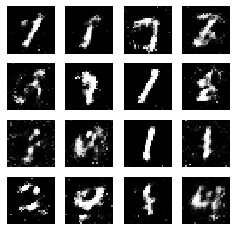

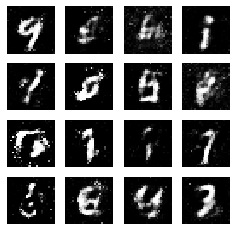

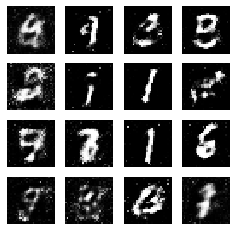

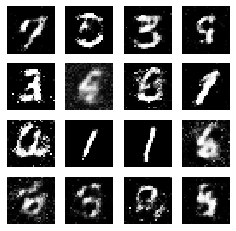

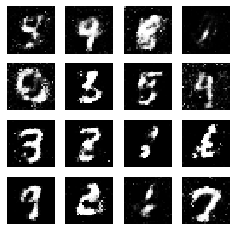

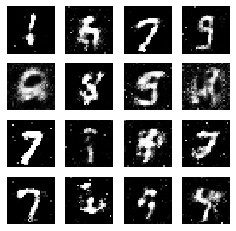

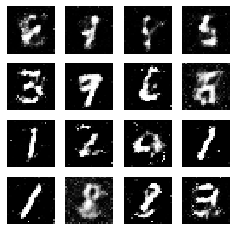

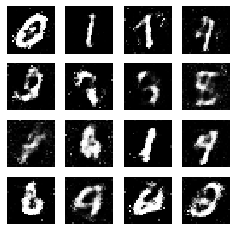

In [46]:
train(iterations,batch_size,sample_interval)